# Unsupervised learning
Unsupervised learning is a type of machine learning algorithm used to draw inferences from datasets consisting of input data without labeled responses [wiki]

### Clustering

Clustering is the task of gathering samples into groups of similar samples according to some predefined similarity or distance (dissimilarity) measure, such as the Euclidean distance.

In [20]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
matplotlib.rcParams['figure.figsize'] = [10, 8]

In [21]:
df_un = pd.read_csv('data/country_total.csv') 
#The first 5 rows
df_un.head()

,country,seasonality,month,unemployment,unemployment_rate
0,at,nsa,1993.01,171000,4.5
1,at,nsa,1993.02,175000,4.6
2,at,nsa,1993.03,166000,4.4
3,at,nsa,1993.04,157000,4.1
4,at,nsa,1993.05,147000,3.9


### Plot unemployment rate (UR) in austria over time

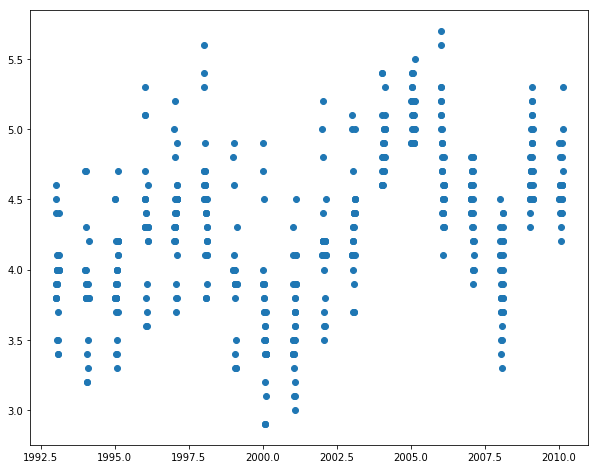

In [22]:
austria = df_un[df_un['country']=='at']
plt.scatter(austria['month'], austria['unemployment_rate'])

### Cluster countries according to their UR

- one of the simplest clustering algorithms, K-means. This is an iterative algorithm which searches for cluster centers such that the distance from each point to its cluster is minimized. 

In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

### Prepare data, run clustering and get the labels

In [61]:
X = df_un[['unemployment_rate','unemployment']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
labels = kmeans.fit_predict(X_scaled)

C:\Users\parul\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\parul\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Plot data where labels are colored differently 

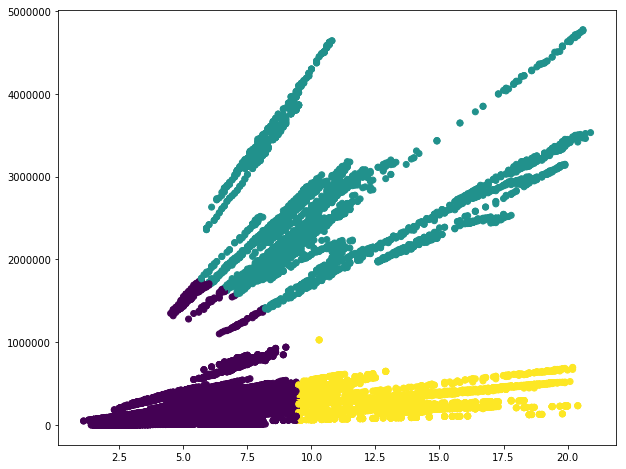

In [62]:
plt.scatter(X['unemployment_rate'], X['unemployment'], c=labels)

### Countries

In [38]:
df_countries = pd.read_csv('data/countries.csv')
df_countries.head()

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
0,at,AT,eu,Austria,Autriche,Österreich,47.696554,13.345980
1,be,BE,eu,Belgium,Belgique,Belgien,50.501045,4.476674
2,bg,BG,eu,Bulgaria,Bulgarie,Bulgarien,42.725674,25.482322
3,hr,HR,non-eu,Croatia,Croatie,Kroatien,44.746643,15.340844
4,cy,CY,eu,Cyprus,Chypre,Zypern,35.129141,33.428682


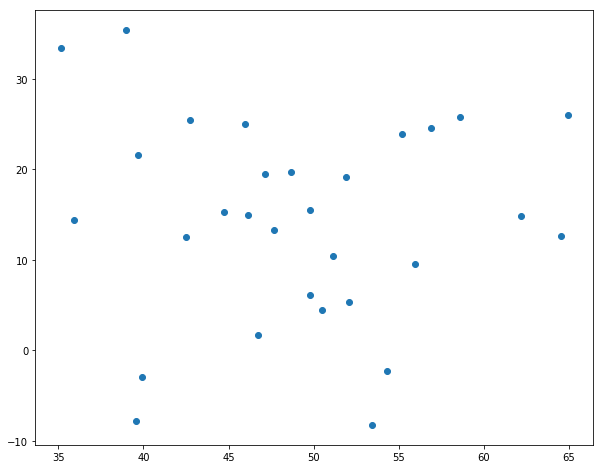

In [39]:
plt.scatter(df_countries['latitude'], df_countries['longitude'])

### _Exercise: Get dominant cluster label for each country_

### DBSCAN algorithm

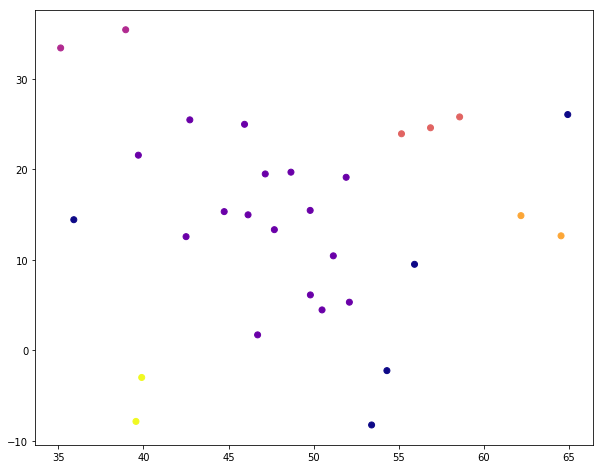

In [57]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df_countries[['latitude','longitude']].to_numpy()
X_scaled = scaler.fit_transform(X)
# cluster the data into five clusters
dbscan = DBSCAN(eps=0.55, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0